In [2]:
import monitor 
M = monitor.Monitor()

In [11]:
file_name = 'test.csv'
M.check(file_name)

2019-10-22 18:16:37
(1, 6)
1364.0 0.0
1636.0 0.0
668.0 0.0
667.0 0.0
0.68 0.0
1.0 0.0


(100, 6)
1364.0 0.0
1636.0 0.0
490.72 141.795
596.43 180.541
0.7188 0.077
0.999 0.006
(100, 6)
1364.0 0.0
1636.0 0.0
514.68 125.926
612.62 189.286
0.7045 0.074
0.9995 0.002
(100, 6)
1364.0 0.0
1636.0 0.0
521.11 139.46
586.97 179.797
0.7111 0.07
0.9997 0.002
(100, 6)
1364.0 0.0
1636.0 0.0
479.63 127.896
590.5 163.437
0.7301 0.069
0.9992 0.003


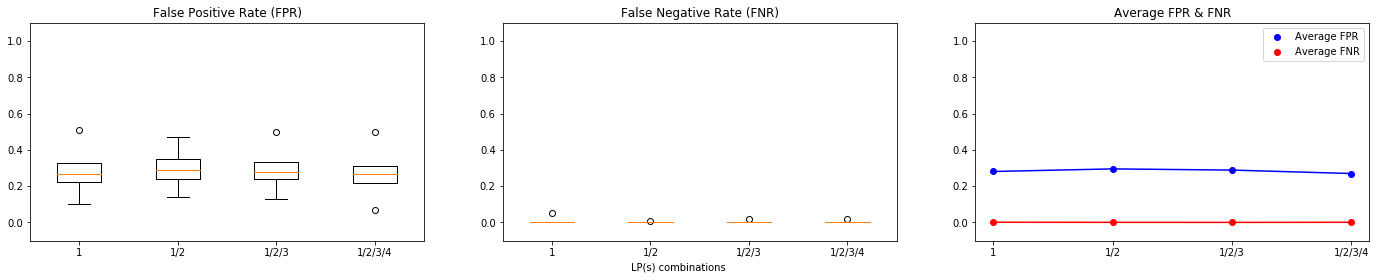

In [5]:
%matplotlib inline
arguments = {'file_names': ['experimental_results_y/Arch_4_Layer_Input_Proper_3000_none.csv',
                           'experimental_results_y/Arch_4_Layer_12_Proper_3000_none.csv', 
                           'experimental_results_y/Arch_4_Layer_123_Proper_3000_none.csv',
                           'experimental_results_y/Arch_4_Layer_1234_Proper_3000_none.csv'],
             'x': ['1', '1/2', '1/2/3', '1/2/3/4'],
#              'x': [1, 2, 3, 4],
             'axis': [0, 5, -0.1, 1.1],
             'x_label': "LP(s) combinations", 
             'sub_x_labels': ['1', '1/2', '1/2/3', '1/2/3/4'],
             'export_file_name': '../Images/Exp4/exp4_3000.png'}

M.draw(arguments)